<a href="https://colab.research.google.com/github/TCU-DCDA/WRIT20833-2025/blob/main/notebooks/codeAlongs/WRIT20833_Instant_Data_Scraper_Ethics_F25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ethical Data Collection with Instant Data Scraper
## From Web Pages to Cultural Datasets

Welcome to practical data collection for cultural research! Today we'll learn to use **Instant Data Scraper**, a browser extension that makes collecting cultural data from websites accessible to humanities researchers without complex coding.

### 🎯 Today's Learning Goals:
- **Install and use Instant Data Scraper** for collecting cultural data
- **Practice ethical data collection** using robots.txt and fair use principles
- **Clean and analyze scraped data** using pandas techniques you already know
- **Transform web data** into research-ready datasets for cultural analysis

### 📚 What We'll Create:
By the end of this lesson, you'll have:
- A working knowledge of browser-based data collection
- Your own scraped cultural dataset **suitable for HW4-1 and HW4-2**
- Clean, analysis-ready data for **term frequency, sentiment analysis, and topic modeling**
- An understanding of ethical data collection practices

### 🔗 Connection to Your Assignments:
The data you collect today will be perfect for:
- **HW4-1**: Term frequency analysis and sentiment analysis with VADER
- **HW4-2**: Topic modeling with Gensim LDA to discover hidden themes
- **Future projects**: Building your own cultural research datasets

### ⚖️ Ethics First:
Before we start collecting data, we'll establish ethical guidelines that respect website owners, cultural institutions, and research subjects. **Good data collection practices are essential for responsible digital humanities work.**

## Part 1: Understanding Ethical Data Collection

### The Golden Rule of Web Scraping
**Collect data as you would want others to collect from your website**: respectfully, legally, and with proper attribution.

### Three Pillars of Ethical Data Collection

#### 1. 🤖 **robots.txt Compliance**
Always check a website's robots.txt file before collecting data.

#### 2. ⚖️ **Legal and Fair Use**
Collect only what you need for legitimate research purposes.

#### 3. 📚 **Attribution and Transparency**
Give proper credit and be transparent about your methods.

### Let's Practice: Checking robots.txt

**How to check robots.txt for any website:**
1. Take the main website URL
2. Add `/robots.txt` to the end
3. Visit that URL to see the rules

**Examples to try:**
- `https://www.imdb.com/robots.txt`
- `https://archive.org/robots.txt`
- `https://www.goodreads.com/robots.txt`

In [2]:
# Let's start by importing the libraries we'll need for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Display settings for better output
pd.options.display.max_rows = 20
pd.options.display.max_columns = 10

print("✅ Libraries imported and ready for cultural data analysis!")

✅ Libraries imported and ready for cultural data analysis!


### 🔍 Activity: Checking robots.txt with Code

Let's use Python to check robots.txt files and understand HTTP status codes:
- **200 = Success**: Permission granted, proceed ethically
- **403 = Forbidden**: Access denied, respect this boundary
- **404 = Not Found**: No robots.txt file exists

In [ ]:
# Let's check robots.txt files programmatically and understand HTTP status codes
import requests

# Check robots.txt for a few cultural sites
sites = [
    ("https://archive.org/robots.txt", "Internet Archive"),
    ("https://www.imdb.com/robots.txt", "IMDb"),
    ("https://httpstat.us/403", "Test: 403 Forbidden")
]

for url, name in sites:
    try:
        response = requests.get(url, timeout=5)
        if response.status_code == 200:
            print(f"✅ {name}: Status 200 (Success) - Access allowed")
        elif response.status_code == 403:
            print(f"❌ {name}: Status 403 (Forbidden) - Access denied, respect this!")
        else:
            print(f"ℹ️ {name}: Status {response.status_code}")
    except:
        print(f"❌ {name}: Connection failed")
    
print("\n💡 Key point: 200 = proceed ethically, 403 = stop and respect the boundary")

### My robots.txt findings:

**Website 1:** [URL]
- What robots.txt says:
- My interpretation:

**Website 2:** [URL]
- What robots.txt says:
- My interpretation:

**Website 3:** [URL]
- What robots.txt says:
- My interpretation:

## Part 2: Installing and Setting Up Instant Data Scraper

**Instant Data Scraper** is a browser extension that automates data collection from web pages without requiring coding knowledge. It's perfect for humanities researchers who want to collect cultural data efficiently.

### Installation Steps:

#### For Chrome Users:
1. Go to the Chrome Web Store
2. Search for "Instant Data Scraper"
3. Click "Add to Chrome"
4. Confirm the installation
5. Look for the extension icon in your browser toolbar

#### For Firefox Users:
1. Go to Firefox Add-ons
2. Search for "Instant Data Scraper"
3. Click "Add to Firefox"
4. Confirm the installation

### 🎯 Quick Test:
Once installed, visit any website with structured data (like a list of articles or products) and click the extension icon. You should see options to start scraping!

## Part 3: Choosing Cultural Data Sources for Text Analysis

### 🎯 What Makes Good Data for HW4-1 and HW4-2?

#### **Best Data Types for Your Assignments:**

**🌟 Excellent Choices:**
- **Product reviews** (books, movies, restaurants): Rich sentiment + varied topics
- **News article summaries**: Clear themes + diverse vocabulary
- **Blog posts or forum discussions**: Substantial text + authentic voice
- **Academic paper abstracts**: Consistent length + rich terminology
- **Museum/gallery descriptions**: Cultural content + descriptive language

**✅ Good Choices:**
- **Book/movie plot summaries**: Narrative content with themes
- **Comment sections** from cultural sites: Varied opinions + informal language
- **Grant or funding descriptions**: Purpose-driven text with clear goals
- **Event or exhibition descriptions**: Cultural context + descriptive details

**⚠️ Challenging for Topic Modeling:**
- **Just titles or headlines**: Too short for meaningful topics
- **Single-word categories**: No content for analysis
- **Heavily technical data**: May have limited vocabulary variation
- **Very short entries**: Less than 20-30 words per entry

### Good Websites for Cultural Data Collection

**✅ Generally Scraper-Friendly Cultural Sites:**
- **Public cultural databases**: Many openly share data for research
- **Academic repositories**: Often encourage scholarly use
- **Government cultural sites**: Public domain information
- **Archive.org collections**: Explicitly supportive of research access

**⚠️ Proceed with Caution:**
- **Commercial sites**: Check terms of service carefully
- **Social media**: May require API access instead
- **Sites with user accounts**: Respect privacy and login requirements

**❌ Generally Avoid:**
- Sites that explicitly prohibit scraping in robots.txt
- Sites requiring personal login information
- Sites with sensitive personal data

### Practice Sites for This Lesson:

We'll practice with sites that are research-friendly and have text-rich cultural data:

1. **Archive.org** - Book descriptions and historical documents
2. **Public library catalogs** - Book summaries and reviews
3. **Museum collection databases** - Artwork descriptions and curatorial notes
4. **Cultural news sites** - Article summaries and cultural commentary
5. **Academic databases** - Paper abstracts and research summaries

## Part 4: Hands-On Scraping Practice

### Practice Session 1: Archive.org Collections

**Target Site**: Archive.org book collections
**Why it's ethical**: Archive.org explicitly supports research access
**What we'll collect**: Book titles, authors, publication dates, subjects, **and descriptions**

#### 🎯 Focus on Text-Rich Data:
For your assignments, prioritize collecting:
- **Book descriptions or summaries** (perfect for topic modeling)
- **Subject classifications** (useful for understanding themes)
- **Reviews or comments** (great for sentiment analysis)
- **Any lengthy text fields** that contain substantial content

#### Step-by-Step Instructions:

1. **Navigate to Archive.org**
   - Go to `archive.org`
   - Click on "Books" or "Texts"
   - Choose a collection that interests you (e.g., "American Literature")
   - **Look for collections with descriptions or summaries**

2. **Activate Instant Data Scraper**
   - Click the extension icon
   - The tool will automatically detect data patterns
   - **Prioritize text fields**: descriptions, summaries, reviews
   - Also capture: titles, authors, dates, subjects

3. **Review and Refine**
   - Check that you're getting substantial text content
   - Adjust selections to include description fields
   - Aim for entries with meaningful text (not just metadata)

4. **Export Data**
   - Choose CSV format for easy pandas import
   - Save with a descriptive name: "archive_books_with_descriptions.csv"
   - Note which column contains your main text for analysis

### 📝 Document Your Process:

**💡 Pro Tips for Better Data:**
- Look for "Description" or "Summary" fields
- Collections with user reviews are excellent for sentiment analysis
- Academic collections often have rich abstracts
- Historical collections may have detailed contextual information

### My Archive.org Scraping Session:

**Collection chosen:**

**Number of items collected:**

**Data fields captured:**

**Any challenges encountered:**

**File saved as:**

## Part 5: Loading and Analyzing Your Scraped Data

Now let's use pandas to analyze the cultural data you just collected!

In [3]:
# Load your scraped data
# Replace 'your_filename.csv' with the actual name of your file

# If you're in Google Colab, you'll need to upload your file first:
# from google.colab import files
# uploaded = files.upload()

# Load the data
# scraped_data = pd.read_csv('your_filename.csv')

# For demonstration, let's create a sample dataset
# Replace this with your actual data loading

sample_scraped_data = {
    'title': ['The Great Gatsby', 'To Kill a Mockingbird', 'Pride and Prejudice',
              'The Catcher in the Rye', 'Lord of the Flies', '1984',
              'Animal Farm', 'Brave New World', 'Jane Eyre', 'Wuthering Heights'],
    'author': ['F. Scott Fitzgerald', 'Harper Lee', 'Jane Austen',
               'J.D. Salinger', 'William Golding', 'George Orwell',
               'George Orwell', 'Aldous Huxley', 'Charlotte Brontë', 'Emily Brontë'],
    'year': [1925, 1960, 1813, 1951, 1954, 1949, 1945, 1932, 1847, 1847],
    'subject': ['American Literature', 'Social Issues', 'Romance',
                'Coming of Age', 'Dystopian', 'Political Fiction',
                'Allegory', 'Science Fiction', 'Gothic', 'Gothic'],
    'pages': [180, 281, 432, 277, 224, 328, 112, 268, 500, 416]
}

scraped_data = pd.DataFrame(sample_scraped_data)

print("📚 Scraped cultural data loaded successfully!")
print(f"Dataset contains {len(scraped_data)} items")
scraped_data.head()

📚 Scraped cultural data loaded successfully!
Dataset contains 10 items


,title,author,year,subject,pages
0,The Great Gatsby,F. Scott Fitzgerald,1925,American Literature,180
1,To Kill a Mockingbird,Harper Lee,1960,Social Issues,281
2,Pride and Prejudice,Jane Austen,1813,Romance,432
3,The Catcher in the Rye,J.D. Salinger,1951,Coming of Age,277
4,Lord of the Flies,William Golding,1954,Dystopian,224


In [4]:
# Explore your scraped data
print("=== SCRAPED DATA EXPLORATION ===")
print(f"Shape: {scraped_data.shape}")
print(f"Columns: {scraped_data.columns.tolist()}")
print("\n=== DATA TYPES ===")
print(scraped_data.dtypes)
print("\n=== MISSING VALUES ===")
print(scraped_data.isnull().sum())
print("\n=== SAMPLE DATA ===")
print(scraped_data.sample(3))

=== SCRAPED DATA EXPLORATION ===
Shape: (10, 5)
Columns: ['title', 'author', 'year', 'subject', 'pages']

=== DATA TYPES ===
title      object
author     object
year        int64
subject    object
pages       int64
dtype: object

=== MISSING VALUES ===
title      0
author     0
year       0
subject    0
pages      0
dtype: int64

=== SAMPLE DATA ===
                   title           author  year        subject  pages
9      Wuthering Heights     Emily Brontë  1847         Gothic    416
4      Lord of the Flies  William Golding  1954      Dystopian    224
1  To Kill a Mockingbird       Harper Lee  1960  Social Issues    281


### Cleaning Your Scraped Data

Scraped data often needs cleaning. Let's apply the pandas techniques you've learned:

In [5]:
# Clean and standardize your scraped data
scraped_cleaned = scraped_data.copy()

# Example cleaning steps (adjust based on your data)

# 1. Standardize text fields
if 'title' in scraped_cleaned.columns:
    scraped_cleaned['title'] = scraped_cleaned['title'].str.strip()  # Remove extra spaces

if 'author' in scraped_cleaned.columns:
    scraped_cleaned['author'] = scraped_cleaned['author'].str.strip()

# 2. Handle numeric fields
if 'year' in scraped_cleaned.columns:
    # Ensure year is numeric
    scraped_cleaned['year'] = pd.to_numeric(scraped_cleaned['year'], errors='coerce')

# 3. Create derived fields for analysis
if 'year' in scraped_cleaned.columns:
    # Create time periods
    def categorize_period(year):
        if pd.isna(year):
            return 'Unknown'
        elif year < 1850:
            return 'Pre-1850'
        elif year < 1900:
            return '1850-1899'
        elif year < 1950:
            return '1900-1949'
        else:
            return '1950+'

    scraped_cleaned['time_period'] = scraped_cleaned['year'].apply(categorize_period)

print("✅ Data cleaning completed!")
print("\n=== CLEANED DATA SAMPLE ===")
scraped_cleaned.head()

✅ Data cleaning completed!

=== CLEANED DATA SAMPLE ===


,title,author,year,subject,pages,time_period
0,The Great Gatsby,F. Scott Fitzgerald,1925,American Literature,180,1900-1949
1,To Kill a Mockingbird,Harper Lee,1960,Social Issues,281,1950+
2,Pride and Prejudice,Jane Austen,1813,Romance,432,Pre-1850
3,The Catcher in the Rye,J.D. Salinger,1951,Coming of Age,277,1950+
4,Lord of the Flies,William Golding,1954,Dystopian,224,1950+


### Analyzing Your Cultural Data

Now let's discover patterns in your scraped cultural data:

In [6]:
# Analyze patterns in your scraped data

print("=== CULTURAL DATA ANALYSIS ===")

# 1. Count by categories
if 'subject' in scraped_cleaned.columns:
    print("\n📊 Subject/Genre Distribution:")
    subject_counts = scraped_cleaned['subject'].value_counts()
    print(subject_counts)

if 'time_period' in scraped_cleaned.columns:
    print("\n📅 Time Period Distribution:")
    period_counts = scraped_cleaned['time_period'].value_counts()
    print(period_counts)

# 2. Author analysis
if 'author' in scraped_cleaned.columns:
    print("\n✍️ Most Represented Authors:")
    author_counts = scraped_cleaned['author'].value_counts().head(5)
    print(author_counts)

# 3. Numeric analysis
if 'year' in scraped_cleaned.columns:
    print("\n📈 Year Statistics:")
    print(f"Earliest work: {scraped_cleaned['year'].min()}")
    print(f"Latest work: {scraped_cleaned['year'].max()}")
    print(f"Average year: {scraped_cleaned['year'].mean():.1f}")

if 'pages' in scraped_cleaned.columns:
    print("\n📖 Page Statistics:")
    print(f"Average pages: {scraped_cleaned['pages'].mean():.1f}")
    print(f"Shortest work: {scraped_cleaned['pages'].min()} pages")
    print(f"Longest work: {scraped_cleaned['pages'].max()} pages")

=== CULTURAL DATA ANALYSIS ===

📊 Subject/Genre Distribution:
subject
Gothic                 2
American Literature    1
Social Issues          1
Coming of Age          1
Romance                1
Dystopian              1
Political Fiction      1
Allegory               1
Science Fiction        1
Name: count, dtype: int64

📅 Time Period Distribution:
time_period
1900-1949    4
1950+        3
Pre-1850     3
Name: count, dtype: int64

✍️ Most Represented Authors:
author
George Orwell          2
F. Scott Fitzgerald    1
Harper Lee             1
J.D. Salinger          1
Jane Austen            1
Name: count, dtype: int64

📈 Year Statistics:
Earliest work: 1813
Latest work: 1960
Average year: 1912.3

📖 Page Statistics:
Average pages: 301.8
Shortest work: 112 pages
Longest work: 500 pages


### Visualizing Your Scraped Data

Let's create visualizations to reveal patterns in your cultural data:

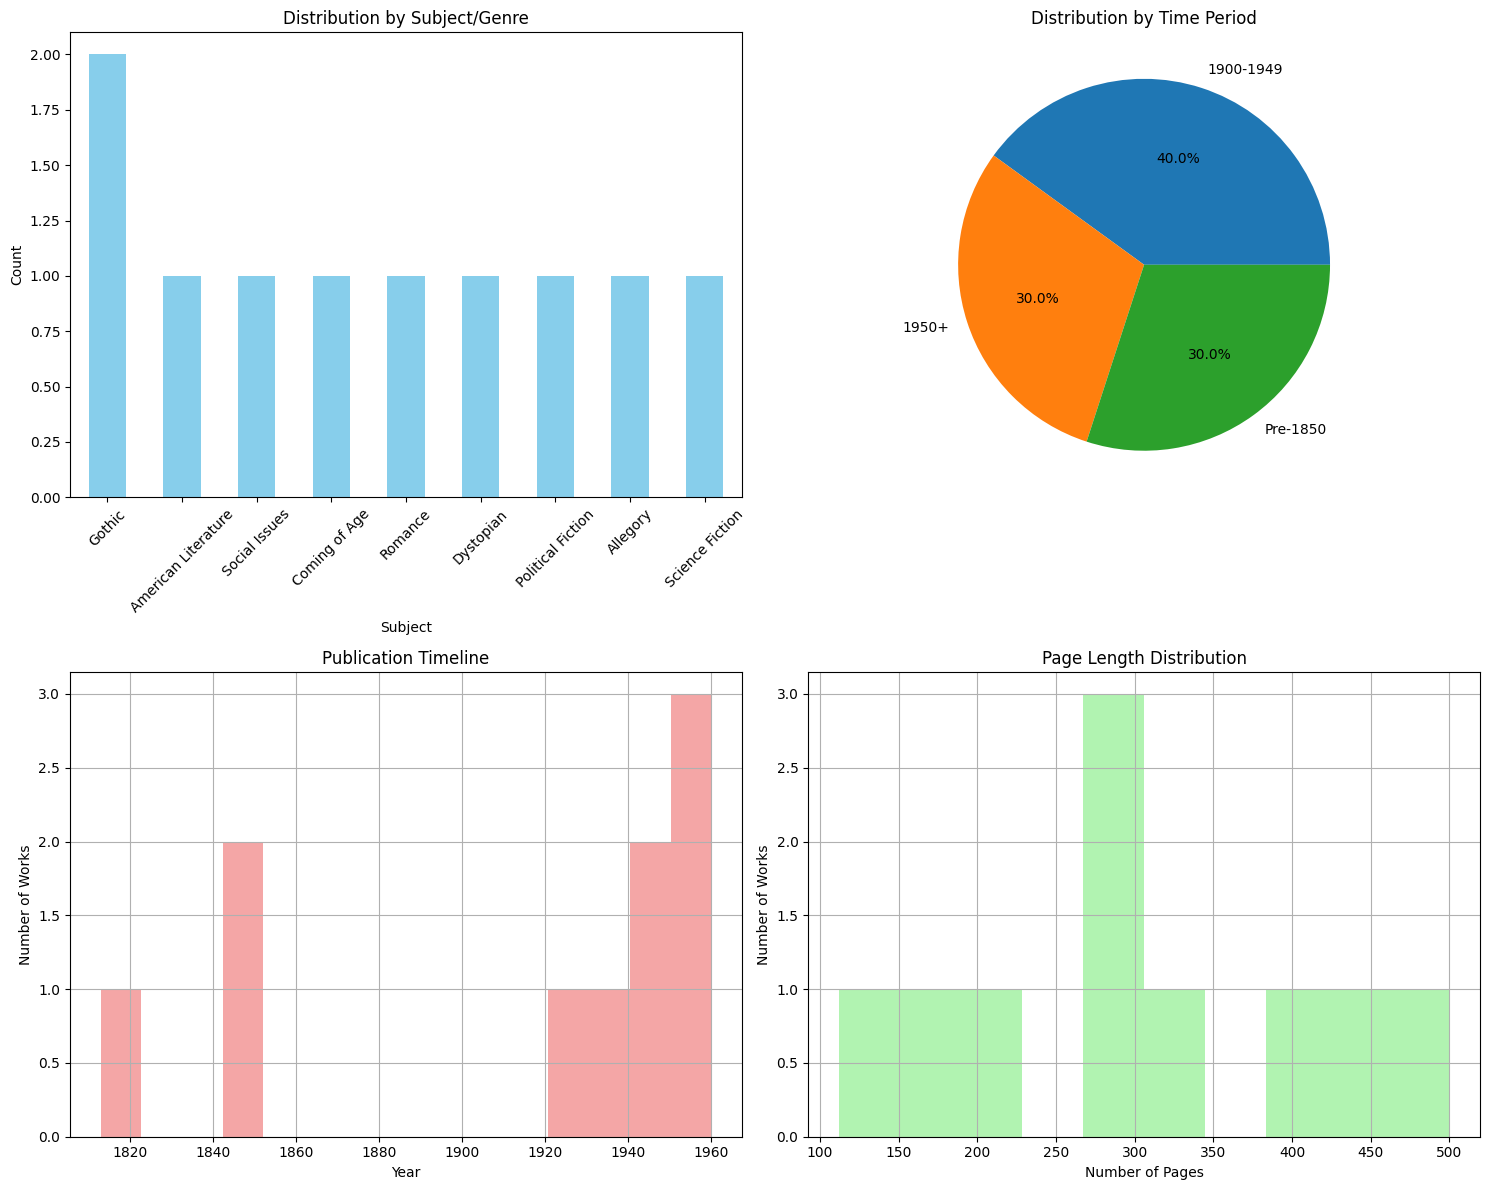

📊 Visualizations created from your scraped cultural data!


In [7]:
# Create visualizations from your scraped data

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Visualization 1: Subject/Genre distribution
if 'subject' in scraped_cleaned.columns:
    subject_counts = scraped_cleaned['subject'].value_counts()
    subject_counts.plot(kind='bar', ax=axes[0,0], color='skyblue')
    axes[0,0].set_title('Distribution by Subject/Genre')
    axes[0,0].set_xlabel('Subject')
    axes[0,0].set_ylabel('Count')
    axes[0,0].tick_params(axis='x', rotation=45)

# Visualization 2: Time period distribution
if 'time_period' in scraped_cleaned.columns:
    period_counts = scraped_cleaned['time_period'].value_counts()
    period_counts.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
    axes[0,1].set_title('Distribution by Time Period')
    axes[0,1].set_ylabel('')

# Visualization 3: Publication timeline
if 'year' in scraped_cleaned.columns:
    scraped_cleaned['year'].hist(bins=15, ax=axes[1,0], color='lightcoral', alpha=0.7)
    axes[1,0].set_title('Publication Timeline')
    axes[1,0].set_xlabel('Year')
    axes[1,0].set_ylabel('Number of Works')

# Visualization 4: Page length distribution
if 'pages' in scraped_cleaned.columns:
    scraped_cleaned['pages'].hist(bins=10, ax=axes[1,1], color='lightgreen', alpha=0.7)
    axes[1,1].set_title('Page Length Distribution')
    axes[1,1].set_xlabel('Number of Pages')
    axes[1,1].set_ylabel('Number of Works')

plt.tight_layout()
plt.show()

print("📊 Visualizations created from your scraped cultural data!")

## Part 6: Advanced Scraping Practice

### Practice Session 2: Your Choice!

Now try scraping a different type of cultural data. Here are some suggestions:

**Option A: Museum Collection**
- Find a museum with an online collection database
- Scrape artwork titles, artists, dates, mediums

**Option B: Library Catalog**
- Choose a public library's online catalog
- Scrape book information for a specific topic

**Option C: Cultural News Site**
- Find an arts/culture news website
- Scrape article titles, dates, and topics

**Option D: Academic Database**
- Look for an open academic repository
- Scrape paper titles, authors, and abstracts

### My Second Scraping Session:

**Website chosen:**

**Why this site (ethical considerations):**

**Robots.txt check results:**

**Data collected:**

**Challenges encountered:**

**Insights discovered:**

In [ ]:
# Load and analyze your second dataset here
# Follow the same pattern as above:
# 1. Load the data
# 2. Clean and standardize
# 3. Analyze patterns
# 4. Create visualizations

# second_dataset = pd.read_csv('your_second_file.csv')
# print(f"Second dataset loaded: {len(second_dataset)} items")
# second_dataset.head()

## Part 7: Data Collection Ethics Reflection

### Comparing Different Collection Methods

Let's reflect on the ethical considerations of different data collection approaches:

#### Browser Extensions vs. Code-Based Scraping

**Browser Extensions (like Instant Data Scraper):**
- ✅ **Easier for beginners**: No complex coding required
- ✅ **Visible process**: You can see exactly what data you're collecting
- ✅ **Human-speed collection**: Less likely to overwhelm servers
- ⚠️ **Limited scale**: Can't easily collect massive datasets
- ⚠️ **Manual operation**: Requires human supervision

**Code-Based Scraping (like Beautiful Soup):**
- ✅ **Powerful automation**: Can collect large datasets quickly
- ✅ **Precise control**: Can implement complex ethical rules
- ⚠️ **Potential for abuse**: Easy to overwhelm servers or ignore robots.txt
- ⚠️ **Technical complexity**: Requires significant programming knowledge

### When to Use Each Approach

**Use Browser Extensions when:**
- You need a few hundred to a few thousand data points
- You want to see exactly what you're collecting
- You're new to data collection
- You want to minimize technical and ethical risks

**Consider Code-Based Scraping when:**
- You need very large datasets (10,000+ items)
- You need to collect data regularly or repeatedly
- You have significant programming experience
- You can implement proper ethical safeguards

### 🤔 Ethical Decision-Making Framework

Before collecting any cultural data, ask yourself:

#### 1. **Legal and Permission Questions:**
- Does robots.txt allow this collection?
- Are there terms of service I need to respect?
- Is this data publicly available for research?

#### 2. **Scale and Impact Questions:**
- How much data do I actually need for my research?
- Will my collection method strain the website's servers?
- Can I space out my requests to be respectful?

#### 3. **Research Purpose Questions:**
- Is this data collection for legitimate academic research?
- Will I give proper attribution to the data source?
- How will I store and protect any sensitive information?

#### 4. **Cultural Sensitivity Questions:**
- Does this data represent people or communities?
- How might my analysis impact those represented in the data?
- Am I considering issues of representation and bias?

## Part 8: Preparing Data for Research Projects

Your scraped data is now ready for serious cultural analysis! Let's prepare it for use in research projects.

In [8]:
# Save your cleaned datasets for future use

# Add metadata to document your collection process
collection_metadata = {
    'collection_date': pd.Timestamp.now(),
    'source_website': 'Your website here',
    'collection_method': 'Instant Data Scraper browser extension',
    'robots_txt_checked': True,
    'ethical_considerations': 'Research use, proper attribution, respect for robots.txt',
    'total_items': len(scraped_cleaned),
    'data_fields': scraped_cleaned.columns.tolist()
}

print("📝 Collection Metadata:")
for key, value in collection_metadata.items():
    print(f"{key}: {value}")

# Save the cleaned dataset
output_filename = 'scraped_cultural_data_cleaned.csv'
scraped_cleaned.to_csv(output_filename, index=False)
print(f"\n✅ Cleaned dataset saved as: {output_filename}")

# Create a documentation file
documentation = f"""
CULTURAL DATA COLLECTION DOCUMENTATION
=====================================

Collection Date: {collection_metadata['collection_date']}
Source: {collection_metadata['source_website']}
Method: {collection_metadata['collection_method']}
Total Items: {collection_metadata['total_items']}
Data Fields: {', '.join(collection_metadata['data_fields'])}

Ethical Considerations:
- Robots.txt compliance: {collection_metadata['robots_txt_checked']}
- Research purpose: Academic cultural analysis
- Attribution: Proper credit given to data source
- Data protection: Stored securely for research use only

Data Processing:
- Text fields standardized (stripped whitespace)
- Numeric fields converted to appropriate types
- Time periods categorized for analysis
- Missing values handled appropriately

Recommended Citation:
Data collected from {collection_metadata['source_website']} on {collection_metadata['collection_date'].strftime('%Y-%m-%d')} using ethical web scraping practices for academic research.
"""

print("\n📚 Data Documentation Created:")
print(documentation)

📝 Collection Metadata:
collection_date: 2025-09-29 02:04:57.935473
source_website: Your website here
collection_method: Instant Data Scraper browser extension
robots_txt_checked: True
ethical_considerations: Research use, proper attribution, respect for robots.txt
total_items: 10
data_fields: ['title', 'author', 'year', 'subject', 'pages', 'time_period']

✅ Cleaned dataset saved as: scraped_cultural_data_cleaned.csv

📚 Data Documentation Created:

CULTURAL DATA COLLECTION DOCUMENTATION

Collection Date: 2025-09-29 02:04:57.935473
Source: Your website here
Method: Instant Data Scraper browser extension
Total Items: 10
Data Fields: title, author, year, subject, pages, time_period

Ethical Considerations:
- Robots.txt compliance: True
- Research purpose: Academic cultural analysis
- Attribution: Proper credit given to data source
- Data protection: Stored securely for research use only

Data Processing:
- Text fields standardized (stripped whitespace)
- Numeric fields converted to appropr

In [9]:
# Topic Modeling Readiness Check
# This helps ensure your data will work well for HW4-2

# Identify your main text column for analysis
# Replace 'text_column' with your actual column name that contains substantial text
# For our sample data, we'll simulate using 'title' but you should use your richest text field

if 'title' in scraped_cleaned.columns:
    text_column = 'title'  # Replace this with your main text column

    print("🔍 TOPIC MODELING READINESS CHECK")
    print("=" * 40)

    # Check 1: Number of documents
    doc_count = len(scraped_cleaned)
    print(f"📊 Total documents: {doc_count}")
    if doc_count >= 500:
        print("   ✅ Good: Sufficient documents for topic modeling")
    elif doc_count >= 200:
        print("   ⚠️  Okay: May work, but more documents would be better")
    else:
        print("   ❌ Warning: You may need more documents for reliable topics")

    # Check 2: Text length analysis
    text_lengths = scraped_cleaned[text_column].str.len()
    avg_length = text_lengths.mean()
    print(f"\n📝 Average text length: {avg_length:.1f} characters")
    if avg_length >= 100:
        print("   ✅ Good: Text entries are substantial")
    elif avg_length >= 50:
        print("   ⚠️  Okay: Text length may be sufficient")
    else:
        print("   ❌ Warning: Text entries may be too short for topic modeling")

    # Check 3: Sample text examination
    print(f"\n📖 Sample text entries:")
    for i in range(min(3, len(scraped_cleaned))):
        sample_text = scraped_cleaned[text_column].iloc[i]
        print(f"   {i+1}. {sample_text[:100]}{'...' if len(sample_text) > 100 else ''}")

    # Check 4: Vocabulary richness preview
    all_text = ' '.join(scraped_cleaned[text_column].astype(str))
    word_count = len(all_text.split())
    unique_words = len(set(all_text.lower().split()))
    vocab_ratio = unique_words / word_count if word_count > 0 else 0

    print(f"\n🔤 Vocabulary analysis:")
    print(f"   Total words: {word_count:,}")
    print(f"   Unique words: {unique_words:,}")
    print(f"   Vocabulary richness: {vocab_ratio:.3f}")

    if vocab_ratio >= 0.3:
        print("   ✅ Good: Rich vocabulary for topic discovery")
    elif vocab_ratio >= 0.2:
        print("   ⚠️  Okay: Moderate vocabulary diversity")
    else:
        print("   ⚠️  Warning: Limited vocabulary - topics may be less distinct")

    print("\n💡 RECOMMENDATIONS:")
    print("   For HW4-1: Focus on term frequency and sentiment analysis")
    print("   For HW4-2: Consider if you need additional data or different text fields")
    print("   If text is short: Look for description/summary fields when scraping")
    print("   If vocabulary is limited: Consider broader or more diverse data sources")

else:
    print("⚠️  Replace 'title' with your actual text column name to run this check")

🔍 TOPIC MODELING READINESS CHECK
📊 Total documents: 10
   ❌ Warning: You may need more documents for reliable topics

📝 Average text length: 15.1 characters
   ❌ Warning: Text entries may be too short for topic modeling

📖 Sample text entries:
   1. The Great Gatsby
   2. To Kill a Mockingbird
   3. Pride and Prejudice

🔤 Vocabulary analysis:
   Total words: 29
   Unique words: 26
   Vocabulary richness: 0.897
   ✅ Good: Rich vocabulary for topic discovery

💡 RECOMMENDATIONS:
   For HW4-1: Focus on term frequency and sentiment analysis
   For HW4-2: Consider if you need additional data or different text fields
   If text is short: Look for description/summary fields when scraping
   If vocabulary is limited: Consider broader or more diverse data sources


## Reflection Questions

Take a moment to reflect on today's data collection experience:

### 1. **Technical Learning:**
- How did using Instant Data Scraper compare to manual data entry?
- What technical challenges did you encounter, and how did you solve them?
- Which aspects of the data cleaning process were most important for your scraped data?
- Did you successfully collect text-rich data suitable for topic modeling?

### 2. **Data Quality for Analysis:**
- How well does your collected data meet the requirements for HW4-1 (sentiment analysis)?
- Do you have sufficient text content for HW4-2 (topic modeling with Gensim LDA)?
- What trade-offs did you make between data quantity and text quality?
- What would you do differently if collecting data again?

### 3. **Ethical Considerations:**
- How did checking robots.txt influence your choice of data sources?
- What ethical questions arose during your data collection process?
- How might different collection methods (manual vs. automated) impact your research ethics?
- How did you balance research needs with respect for website resources?

### 4. **Research Applications:**
- What cultural questions could you explore with the data you collected today?
- How does having access to larger datasets change the kinds of research questions you can ask?
- What specific topics or themes do you predict will emerge from your data in topic modeling?
- What limitations or biases might exist in your scraped data?

### 5. **Future Learning:**
- What other types of cultural data would you like to learn to collect?
- How might you use these data collection skills in your future research or coursework?
- What questions do you have about more advanced data collection techniques?
- How confident do you feel about proceeding to text analysis with your collected data?

*Write your reflections in the cell below:*

### My Reflections on Data Collection:

**Technical Learning:**

**Ethical Considerations:**

**Research Applications:**

**Future Learning:**

## Summary: From Web Pages to Cultural Insights

Congratulations! You've successfully learned to collect, clean, and analyze cultural data from the web using ethical practices.

### ✅ Key Skills Accomplished Today:

**Ethical Data Collection:**
- ✅ Checking robots.txt for permission
- ✅ Respecting website terms and server load
- ✅ Documenting collection methods transparently
- ✅ Giving proper attribution to data sources

**Technical Data Skills:**
- ✅ Installing and using Instant Data Scraper
- ✅ Collecting structured data from cultural websites
- ✅ Cleaning and standardizing scraped data with pandas
- ✅ Creating visualizations from web-collected data

**Research Preparation:**
- ✅ Preparing datasets for cultural analysis projects
- ✅ Creating proper documentation for research use
- ✅ Understanding limitations and biases in scraped data
- ✅ Connecting data collection to research questions

### 🚀 Next Steps in Your Digital Humanities Journey:

**Immediate Applications:**
- Use scraped data for text analysis assignments (HW4-1 style projects)
- Apply these collection methods to research topics that interest you
- Practice ethical data collection with different types of cultural sites

**Advanced Learning:**
- Learn about APIs for accessing cultural databases
- Explore more sophisticated text analysis techniques
- Study digital humanities research methodologies

**Critical Perspective:**
- Always consider the ethical implications of your data collection
- Think critically about representation and bias in cultural datasets
- Understand the limitations of automated data collection methods

### 💡 Remember:
**Good data collection is the foundation of trustworthy cultural research.** The ethical practices and technical skills you've learned today will serve you throughout your digital humanities work. Always prioritize respect, transparency, and proper attribution in your research methods.

**You're now equipped to collect cultural data responsibly and analyze it meaningfully** - essential skills for 21st-century humanities scholarship!